/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


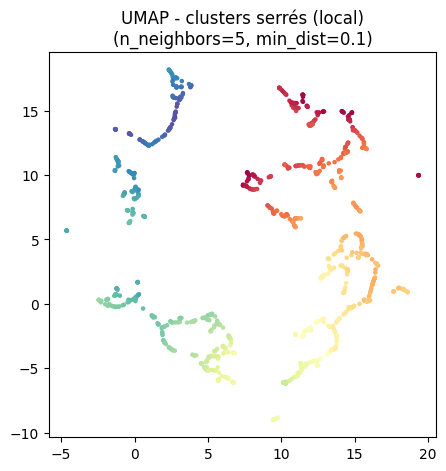

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


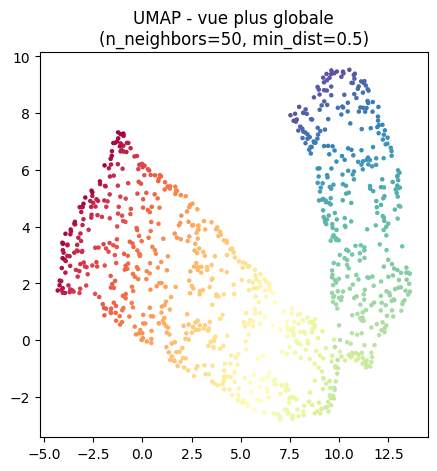

In [ ]:
# --- Installations si besoin ---
# !pip install umap-learn matplotlib scikit-learn

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_swiss_roll
import umap

# Générer dataset : cercles concentriques
# X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
X, y = make_swiss_roll(n_samples=1000, noise=0.05)

# Fonction pour appliquer UMAP avec paramètres variables
def plot_umap(X, y, n_neighbors, min_dist, title):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_embedded = reducer.fit_transform(X)

    plt.figure(figsize=(5,5))
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap="Spectral", s=5)
    plt.title(f"{title}\n(n_neighbors={n_neighbors}, min_dist={min_dist})")
    plt.show()

# Comparaison de différents réglages
plot_umap(X, y, n_neighbors=5, min_dist=0.1, title="UMAP - clusters serrés (local)")
plot_umap(X, y, n_neighbors=50, min_dist=0.5, title="UMAP - vue plus globale")


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


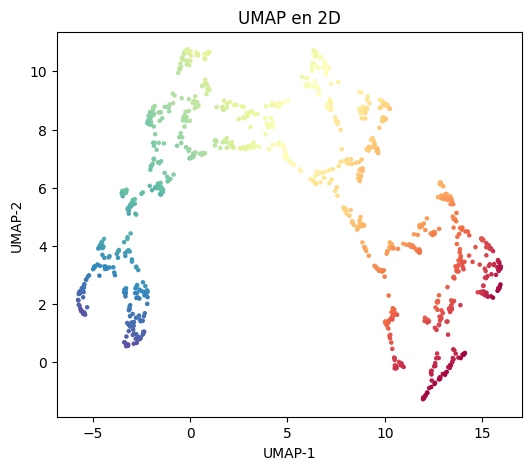

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


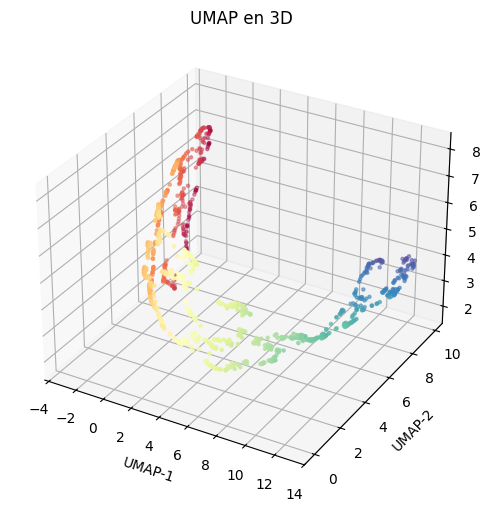

In [ ]:
# --- Installations si besoin ---
# !pip install umap-learn matplotlib scikit-learn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
import umap

# Générer un dataset 3D (spirale suisse)
X, y = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# ---- Projection UMAP en 2D ----
reducer_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap_2d = reducer_2d.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y, cmap="Spectral", s=5)
plt.title("UMAP en 2D")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()

# ---- Projection UMAP en 3D ----
reducer_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap_3d = reducer_3d.fit_transform(X)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_umap_3d[:,0], X_umap_3d[:,1], X_umap_3d[:,2], c=y, cmap="Spectral", s=5)
ax.set_title("UMAP en 3D")
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
plt.show()


In [ ]:
# --- Installations si besoin ---
# !pip install umap-learn plotly scikit-learn

import plotly.express as px
from sklearn.datasets import make_swiss_roll
import umap

# Générer un dataset 3D (spirale suisse)
X, y = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# Réduction de dimension avec UMAP en 3D
reducer_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap_3d = reducer_3d.fit_transform(X)

# Affichage interactif
fig = px.scatter_3d(
    x=X_umap_3d[:,0], y=X_umap_3d[:,1], z=X_umap_3d[:,2],
    color=y,  # Coloration par la position originale dans la spirale
    title="Visualisation UMAP en 3D (interactif)",
    opacity=0.7
)

fig.update_traces(marker=dict(size=3))  # Taille des points
fig.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
!pip install umap-learn plotly scikit-learn

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px

# Charger un jeu de données d'exemple (chiffres manuscrits)
digits = load_digits()
X = digits.data
y = digits.target

# Réduction de dimension avec PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=3, random_state=42, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X)

# Réduction de dimension avec UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X)

# Graphiques interactifs 3D
fig_pca = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=y.astype(str), title="PCA en 3D (Interactif)",
    labels={"x": "PC1", "y": "PC2", "z": "PC3"}
)
fig_pca.show()

fig_tsne = px.scatter_3d(
    x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2],
    color=y.astype(str), title="t-SNE en 3D (Interactif)",
    labels={"x": "Dim1", "y": "Dim2", "z": "Dim3"}
)
fig_tsne.show()

fig_umap = px.scatter_3d(
    x=X_umap[:, 0], y=X_umap[:, 1], z=X_umap[:, 2],
    color=y.astype(str), title="UMAP en 3D (Interactif)",
    labels={"x": "UMAP1", "y": "UMAP2", "z": "UMAP3"}
)
fig_umap.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

